# Homework 5

# Chapter 1

## Problem 3

We are given a transformation $\phi(\mathbf{x}) = \mathbf{z} = (1, z_1, z_2, ..., z_{\tilde{d}})$ 

with $d_{vc} \leq \tilde{d} + 1$, see slide 4 of lecture 9.

In our problem we have $\tilde{d} = 14$, so $d_{vc} \leq 14 + 1 = 15$ .

This let's us exclude options [d] 20 and [e] 21.

________________

We will show that $d_{vc} \geq 6$ by shattering a set of $N = 6$ points. This will exclude options [a] 3 and [b] 5.

The set of $N = 6$ points that we choose are:


$P = \{(-2.5,0.1), (-1.5,-0.1), (-0.5,0.1), (0.5,-0.1), (1.5,0.1), (2.5,-0.1) \}$

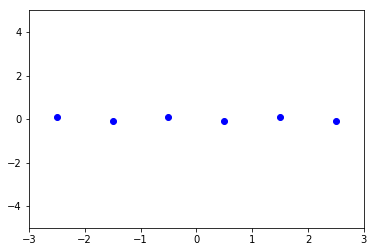

In [1]:
import matplotlib.pyplot as plt
import numpy as np

xp = np.array([-2.5, -1.5, -0.5, 0.5, 1.5, 2.5])
yp = np.array([0.1, -0.1, 0.1, -0.1, 0.1, -0.1])

plt.plot(xp, yp, 'bo')
plt.xlim(-3,3)
plt.ylim(-5,5)
plt.show()

The idea is to use a fourth order polynomial to separate the points to generate dichotomies. Let's plot the function

$f(x) = (x+2)(x+1)(x-1)(x-2)$

The function was specifically constructed in such a way that the roots are at $x = -2, -1, 1, 2$.

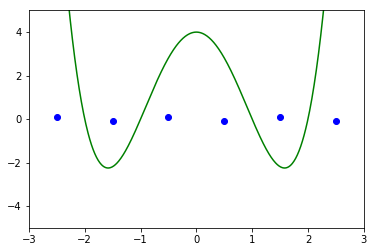

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return (x+2)*(x+1)*(x-1)*(x-2)


xp = np.array([-2.5, -1.5, -0.5, 0.5, 1.5, 2.5])
yp = np.array([0.1, -0.1, 0.1, -0.1, 0.1, -0.1])

xf = np.arange(-3,3,0.01)
yf = f(xf)

plt.plot(xp, yp, 'bo')
plt.plot(xf,yf,'g')

plt.xlim(-3,3)
plt.ylim(-5,5)
plt.show()

Let's manually color the points. Points above are painted red and points below the function curve are plotted blue. 

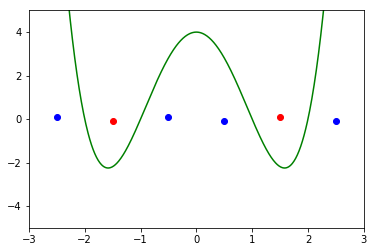

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return (x+2)*(x+1)*(x-1)*(x-2)


xp = np.array([-2.5, -1.5, -0.5, 0.5, 1.5, 2.5])
yp = np.array([0.1, -0.1, 0.1, -0.1, 0.1, -0.1])

xf = np.arange(-3,3,0.01)
yf = f(xf)

yf_at_xp = f(xp)
above = yp > yf_at_xp
below = ~above


plt.plot(xp[above], yp[above], 'ro')
plt.plot(xp[below], yp[below], 'bo')

# plot separation boundary
plt.plot(xf,yf,'g')

plt.xlim(-3,3)
plt.ylim(-5,5)
plt.show()

Now that we understand the idea, we have to find the right hypothesis for each dichotomy that we want to generate.

We start by considering 0 out of 6 being colored red, then proceed

by considering 1 out of 6 being colored red, then proceed

by considering 2 out of 6 being colored red, then proceed

by considering 3 out of 6 being colored red.

At this point we can stop because for the case of 4 out of 6 being red, which is equivalent to 2 out of 6 being blue,

we can use the case of 2 out of 6 being red and just reverse the colors to 2 out of 6 being blue.

____

Note that points on the separating boundary are neither classified as $-1$ nor as $+1$ by the perceptron classifier, so they must be classified as zero:

$h(z) = \text{sign}(\tilde{w}^T z) = 0$

$ \tilde{w}_0 1 + \tilde{w}_1 z_1 + \tilde{w}_2 z_2 + ... + \tilde{w}_d z_d = 0 $ 

____

# Chapter 2

# 0 out of 6 colored red


### horizontal line as separating boundary

This dichotomy can be achieved by a horizontal line at $y = 2$  above all points. $y = 2$ corresponds to $x_2 = 2$ or $x_2 - 2 = 0$.

Now, let's look at our $(\tilde{d}+1)$ dimensional Z-space with $\tilde{d} = 14$. A point in the Z-space looks as follows:

$\mathbf{z} = (1,   x_1,       x_2,     x_1^2,   x_1 x_2, 
  x^2_2, x_1^3, x^2_1 x_2, x_1 x_2^2,     x_2^3,
  x_1^4, x_1^3 x_2, x_1^2 x_2^2, x_1 x_2^3, x_2^4)^T
  $

### choosing the weight vector

The weight vector $\tilde{w}$ has 15 entries too:

$\tilde{\mathbf{w}} = [\tilde{w}_0, \tilde{w}_1, \tilde{w}_2, ...,  \tilde{w}_{14}]^T$

The classification in the Z-space happens as follows (see slide 4 of lecture 4):

$h(\mathbf{x}) = \text{sign}(\tilde{\mathbf{w}}^T \Phi(x)) = \text{sign}(\tilde{\mathbf{w}}^T \mathbf{z})$

Now, we said that in order to get the boundary curves we set the classification to zero:

$ \text{sign}(\tilde{\mathbf{w}}^T \mathbf{z}) = 0$

The equation holds if the argument is zero, so:

$\tilde{\mathbf{w}}^T \mathbf{z} = 0$

Now, we have to choose $\tilde{\mathbf{w}}$ such that we get the equation $x_2 - 2 = 0$.

If we look at the entries of the $z$-vector, then we recognize that there is a constant at $z_0$ and an $x_2$ at $z_2$.

So let's pick $w_0 = -2$, $w_2 = 1$, and set the remaining entries of $\tilde{\mathbf{w}}$ to zero:

$\tilde{\mathbf{w}} = [-2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]^T$

Now plug in the weight vector:


$\tilde{\mathbf{w}}^T \mathbf{z} = [-2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] (1,   x_1,       x_2,     x_1^2,   x_1 x_2, 
  x^2_2, x_1^3, x^2_1 x_2, x_1 x_2^2,     x_2^3,
  x_1^4, x_1^3 x_2, x_1^2 x_2^2, x_1 x_2^3, x_2^4)^T = -2 + x_2 = 0$

___________________




### classifying the points

Let's see what happens if we classify our six points using that weight vector. For this we will introduce a feature matrix  $\mathbf{Z}$. Each row in that matrix has the form 


$(1,   x_1,       x_2,     x_1^2,   x_1 x_2, 
  x^2_2, x_1^3, x^2_1 x_2, x_1 x_2^2,     x_2^3,
  x_1^4, x_1^3 x_2, x_1^2 x_2^2, x_1 x_2^3, x_2^4)
$


The classifications are obtained by $\mathbf{Z} \mathbf{\tilde{w}}$

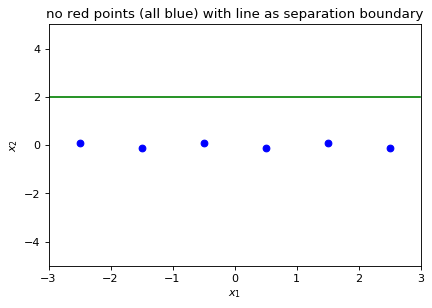

In [4]:
N = 6
x1 = np.array(xp)
x2 = np.array(yp)

Z = np.array([np.ones(N), x1, x2, x1**2, x1*x2, 
    x2**2, x1**3, x1**2 * x2, x1 * x2**2, x2**3,
    x1**4, x1**3 *x2, x1**2 * x2**2, x1* x2**3, x2**4]).T

w_tilde = np.array([-2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

y_class = np.sign(np.dot(Z, w_tilde))

#----------------------

import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2 + 0*x


xp = np.array([-2.5, -1.5, -0.5, 0.5, 1.5, 2.5])
yp = np.array([0.1, -0.1, 0.1, -0.1, 0.1, -0.1])

xf = np.arange(-3,3,0.01)
yf = f(xf)

# color points according to their classification
fig1 = plt.figure(1, dpi=80)

plt.plot(xp[y_class == +1], yp[y_class == +1], 'ro')
plt.plot(xp[y_class == -1], yp[y_class == -1], 'bo')

# plot separation boundary
plt.plot(xf,yf,'g')

plt.title('no red points (all blue) with line as separation boundary')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim(-3,3)
plt.ylim(-5,5)
plt.show()

fig1.savefig('figures/0_of_6_colored_red.png')
fig1.savefig('figures/0_of_6_colored_red.svg')

We see that all points have the same color.

# Chapter 3

# 1 out of 6 colored red

## parabolas as separating boundary

We can pick any of the 6 points and color it red, while the other ones are colored blue by using a parabola with the equation

$f(x) = (x - r_1)(x - r_2)$

with $r_1, r_2$ being the roots. Let's choose $r_1 = -1, r_2 = 0$ to color the third point at $(-0.5, 0.1)$ red. The equation for the parabola is

$f(x) = (x + 1) (x - 0) = x^2 + x$

So the equation is 

$y = x^2 + x$ or 

$x_2 = x_1^2 + x_1$ or 

$x_1 - x_2 + x_1^2 = 0$

Recall that we get this equation as a separating boundary if we consider points that are classified as zero, so:

$\text{sign}(\tilde{\mathbf{w}}^T \mathbf{z}) = 0 \iff \tilde{\mathbf{w}}^T \mathbf{z} = 0$

We can get the parabola equation by choosing

$\mathbf{\tilde{w}} = [0, 1, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]$

So

$\tilde{\mathbf{w}}^T \mathbf{z} = 0$ 

$\Rightarrow x_1 - x_2 + x_1^2 = 0$

Let's classify our points using that weight vector:

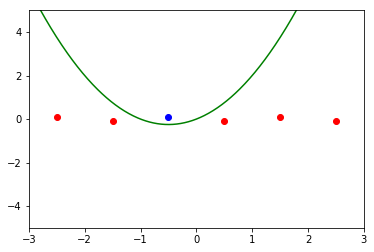

In [5]:
N = 6
x1 = np.array(xp)
x2 = np.array(yp)

Z = np.array([np.ones(N), x1, x2, x1**2, x1*x2, 
    x2**2, x1**3, x1**2 * x2, x1 * x2**2, x2**3,
    x1**4, x1**3 *x2, x1**2 * x2**2, x1* x2**3, x2**4]).T

w_tilde = np.array([0, 1, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

y_class = np.sign(np.dot(Z, w_tilde))

#----------------------

import matplotlib.pyplot as plt
import numpy as np

# separating boundary
def f(x):
    return x**2 + x


xp = np.array([-2.5, -1.5, -0.5, 0.5, 1.5, 2.5])
yp = np.array([0.1, -0.1, 0.1, -0.1, 0.1, -0.1])

xf = np.arange(-3,3,0.01)
yf = f(xf)

# color points according to their classification
plt.plot(xp[y_class == +1], yp[y_class == +1], 'ro')
plt.plot(xp[y_class == -1], yp[y_class == -1], 'bo')

plt.plot(xf,yf,'g')

plt.xlim(-3,3)
plt.ylim(-5,5)
plt.show()

We see that the colors are reversed, i.e. we have 1 blue and 5 red points. However, this is not a problem for we can simply reverse the sign of the weight vector:

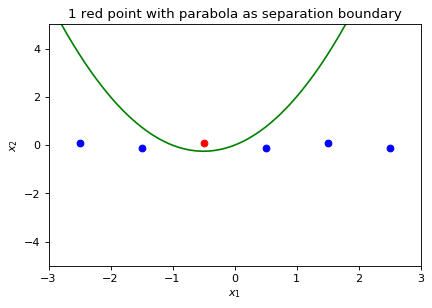

In [6]:
N = 6
x1 = np.array(xp)
x2 = np.array(yp)

Z = np.array([np.ones(N), x1, x2, x1**2, x1*x2, 
    x2**2, x1**3, x1**2 * x2, x1 * x2**2, x2**3,
    x1**4, x1**3 *x2, x1**2 * x2**2, x1* x2**3, x2**4]).T

w_tilde = -np.array([0, 1, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

y_class = np.sign(np.dot(Z, w_tilde))

#----------------------

import matplotlib.pyplot as plt
import numpy as np

# separating boundary
def f(x):
    return x**2 + x


xp = np.array([-2.5, -1.5, -0.5, 0.5, 1.5, 2.5])
yp = np.array([0.1, -0.1, 0.1, -0.1, 0.1, -0.1])

xf = np.arange(-3,3,0.01)
yf = f(xf)

# color points according to their classification
fig2 = plt.figure(2, dpi=80)

plt.plot(xp[y_class == +1], yp[y_class == +1], 'ro')
plt.plot(xp[y_class == -1], yp[y_class == -1], 'bo')

# plot separation boundary
plt.plot(xf,yf,'g')

plt.title('1 red point with parabola as separation boundary')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim(-3,3)
plt.ylim(-5,5)
plt.show()

fig2.savefig('figures/1_of_6_colored_red.png')
fig2.savefig('figures/1_of_6_colored_red.svg')

## Circle as separating boundary

Alternatively, we could also have used a circle or an ellipse as a separating boundary to pick a single point, e.g. let's pick 
the circle with center at $(-0.5, 0)$ and radius $0.3$. The equation for such a circle is:

$ (\vec{x} - \vec{m})^2 = r^2 $


\begin{equation}
\left (
\begin{bmatrix}
x_1  \\
x_2
\end{bmatrix}-
\begin{bmatrix}
-0.5 \\
0
\end{bmatrix} 
\right ) ^2
=
  0.3^2 
\end{equation}


$\iff (x_1 + 0.5)^2 + x_2^2 = 0.3^2$

$\iff  -0.65 + x_1 + x_1^2 + x_2^2 = 0$


To get that equation as the separation boundary we pick the weight vector

$\mathbf{\tilde{w}} = [-0.65, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]$

Let's classify our points:

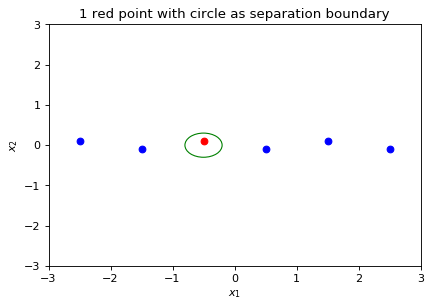

In [7]:
N = 6
x1 = np.array(xp)
x2 = np.array(yp)

Z = np.array([np.ones(N), x1, x2, x1**2, x1*x2, 
    x2**2, x1**3, x1**2 * x2, x1 * x2**2, x2**3,
    x1**4, x1**3 *x2, x1**2 * x2**2, x1* x2**3, x2**4]).T

# I've put a minus sign here to switch the classification (switch the colors)
w_tilde = -np.array([-0.65, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

y_class = np.sign(np.dot(Z, w_tilde))

#----------------------

import matplotlib.pyplot as plt
import numpy as np


fig3 = plt.figure(3, dpi = 80)

# plot separation boundary
circle = plt.Circle((-0.5, 0), 0.3, color='g', fill=False)
ax = plt.gca()
ax.add_artist(circle)

# points to be classified
xp = np.array([-2.5, -1.5, -0.5, 0.5, 1.5, 2.5])
yp = np.array([0.1, -0.1, 0.1, -0.1, 0.1, -0.1])

# color points according to their classification
plt.plot(xp[y_class == -1], yp[y_class == -1], 'bo')
plt.plot(xp[y_class == +1], yp[y_class == +1], 'ro')

plt.title('1 red point with circle as separation boundary')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

fig3.savefig('figures/1_of_6_colored_red_using_circle.png')
fig3.savefig('figures/1_of_6_colored_red_using_circle.svg')

# Chapter 4

# 2 out of 6 colored red

## Fourth order polynomial as separating boundary

Let's color the second and fifth point red, and the remaining points blue. For this we will use a fourth order polynomial of the form as the separating boundary:

$f(x) = (x - r_1)(x - r_2)(x - r_3)(x - r_4)$

with $r_i$ being the roots. We place the roots in such a way that the second and fifth point are in a "valley".

Since the second point is at $(-1.5, -0.1)$ we choose the roots $r_1 = -2, r_2 = -1$ 

Similarly, the fifth point is at $(1.5, 0.1)$ and we choose the roots $r_3 = 1, r_4 = 2$

$\Rightarrow f(x) = (x + 2)(x +1 )(x - 1)(x - 2)$

The equation can be written as 

$y = f(x) = (x + 2)(x +1 )(x - 1)(x - 2)$ 

or 

$x_2 = (x_1 + 2)(x_1 + 1)(x_1 - 1)(x_1 - 2)$

$\iff 4 - x_2 - 5 x_1^2 + x_1^4 = 0$

To get that equation as the separation boundary we pick the weight vector

$\mathbf{\tilde{w}} = [4, 0, -1, -5, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]$

Let's classify our points:

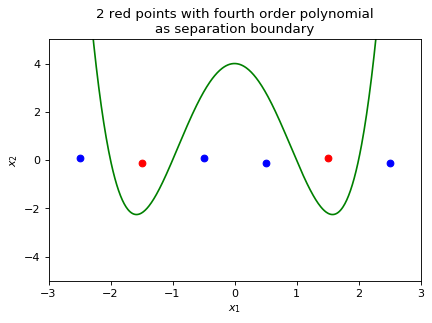

In [8]:
N = 6
x1 = np.array(xp)
x2 = np.array(yp)

Z = np.array([np.ones(N), x1, x2, x1**2, x1*x2, 
    x2**2, x1**3, x1**2 * x2, x1 * x2**2, x2**3,
    x1**4, x1**3 *x2, x1**2 * x2**2, x1* x2**3, x2**4]).T

w_tilde = -np.array([4, 0, -1, -5, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

y_class = np.sign(np.dot(Z, w_tilde))

#----------------------

import matplotlib.pyplot as plt
import numpy as np

# separating boundary
def f(x):
    return (x+2)*(x+1)*(x-1)*(x-2)


xp = np.array([-2.5, -1.5, -0.5, 0.5, 1.5, 2.5])
yp = np.array([0.1, -0.1, 0.1, -0.1, 0.1, -0.1])

xf = np.arange(-3,3,0.01)
yf = f(xf)

# color points according to their classification
fig4 = plt.figure(4, dpi = 80)

plt.plot(xp[y_class == +1], yp[y_class == +1], 'ro')
plt.plot(xp[y_class == -1], yp[y_class == -1], 'bo')

# plot separation boundary
plt.plot(xf,yf,'g')

plt.title('2 red points with fourth order polynomial\nas separation boundary')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim(-3,3)
plt.ylim(-5,5)
plt.show()

fig4.savefig('figures/2_of_6_colored_red.png')
fig4.savefig('figures/2_of_6_colored_red.svg')

# Chapter 5

# 3 out of 6 colored red

Let's look at all the dichotomies with 3 out of 6 points colored red:

```
1 	 ['b', 'b', 'b', 'r', 'r', 'r']
2 	 ['b', 'b', 'r', 'b', 'r', 'r']
3 	 ['b', 'b', 'r', 'r', 'b', 'r']
4 	 ['b', 'b', 'r', 'r', 'r', 'b']
5 	 ['b', 'r', 'b', 'b', 'r', 'r']
6 	 ['b', 'r', 'b', 'r', 'b', 'r']
7 	 ['b', 'r', 'b', 'r', 'r', 'b']
8 	 ['b', 'r', 'r', 'b', 'b', 'r']
9 	 ['b', 'r', 'r', 'b', 'r', 'b']
10 	 ['b', 'r', 'r', 'r', 'b', 'b']
11 	 ['r', 'b', 'b', 'b', 'r', 'r']
12 	 ['r', 'b', 'b', 'r', 'b', 'r']
13 	 ['r', 'b', 'b', 'r', 'r', 'b']
14 	 ['r', 'b', 'r', 'b', 'b', 'r']
15 	 ['r', 'b', 'r', 'b', 'r', 'b']
16 	 ['r', 'b', 'r', 'r', 'b', 'b']
17 	 ['r', 'r', 'b', 'b', 'b', 'r']
18 	 ['r', 'r', 'b', 'b', 'r', 'b']
19 	 ['r', 'r', 'b', 'r', 'b', 'b']
20 	 ['r', 'r', 'r', 'b', 'b', 'b']
```

There are ${6 \choose 3} = 20$ cases.

## Cases with two adjacent points having the same color (cases 1-5, 7-14, 16-20)

- Cases 1 and 20 are easy to realize with a parabole (or ellipse).

- For the other cases we will use a fourth order polynomial to "scoop" certain points. Let's pick case 7 as a representative example for these cases.

In case 7 we have the dichotomy 

`['b', 'r', 'b', 'r', 'r', 'b']`


For this we will use a fourth order polynomial of the form as the separating boundary:

$f(x) = (x - r_1)(x - r_2)(x - r_3)(x - r_4)$

with $r_i$ being the roots. We place the roots in such a way that the second point is in a valley, and the fifth and fourth point are in a "valley".

Since the second point is at $(-1.5, -0.1)$ we choose the roots $r_1 = -2, r_2 = -1$ 

Similarly, the fourth point is at $(0.5, -0.1)$ and the fifth point is at $(1.5, 0.1)$. So we choose the roots $r_3 = 0, r_4 = 2$

$\Rightarrow f(x) = (x + 2)(x + 1)(x - 0)(x - 2)$

The equation can be written as 

$y = f(x) = (x + 2)(x +1 )(x - 0)(x - 2)$ 

or 

$x_2 = (x_1 + 2)(x_1 + 1)(x_1 - 0)(x_1 - 2)$

$\iff -x_1^4 - x_1^3 + 4x_1^2 + 4x_1 + x_2 = 0$

$\iff 4x_1 + x_2 + 4x_1^2 - x_1^3- x_1^4  = 0$


To get that equation as the separation boundary we pick the weight vector

$\mathbf{\tilde{w}} = [0, 4, 1, 4, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0]$

Let's classify our points:

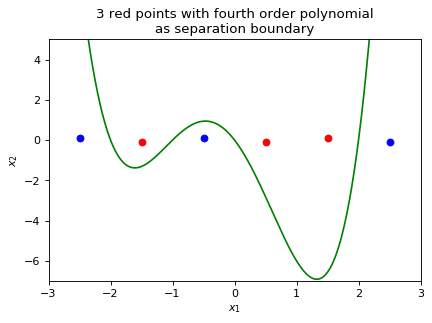

In [9]:
N = 6
x1 = np.array(xp)
x2 = np.array(yp)

Z = np.array([np.ones(N), x1, x2, x1**2, x1*x2, 
    x2**2, x1**3, x1**2 * x2, x1 * x2**2, x2**3,
    x1**4, x1**3 *x2, x1**2 * x2**2, x1* x2**3, x2**4]).T

w_tilde = np.array([0, 4, 1, 4, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0])

y_class = np.sign(np.dot(Z, w_tilde))

#----------------------

import matplotlib.pyplot as plt
import numpy as np

# separating boundary
def f(x):
    return (x + 2)*(x + 1)*(x - 0)*(x - 2)


xp = np.array([-2.5, -1.5, -0.5, 0.5, 1.5, 2.5])
yp = np.array([0.1, -0.1, 0.1, -0.1, 0.1, -0.1])

xf = np.arange(-3,3,0.01)
yf = f(xf)

# color points according to their classification
fig5 = plt.figure(5, dpi = 80)

plt.plot(xp[y_class == +1], yp[y_class == +1], 'ro')
plt.plot(xp[y_class == -1], yp[y_class == -1], 'bo')

# plot separation boundary
plt.plot(xf,yf,'g')

plt.title('3 red points with fourth order polynomial\nas separation boundary')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim(-3,3)
plt.ylim(-7,5)
plt.show()

fig5.savefig('figures/3_of_6_colored_red.png')
fig5.savefig('figures/3_of_6_colored_red.svg')

## Case 6 (and 15): Horizontal line for alternating colors

For alternating colors of the points we pick a horizontal line at $y = 0$ as separating boundary.

$y = 0$ is equivalent to $x_2 = 0$, and we can get that equation by choosing the weight vector

$\mathbf{\tilde{w}} = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]$

Let's classify our points:

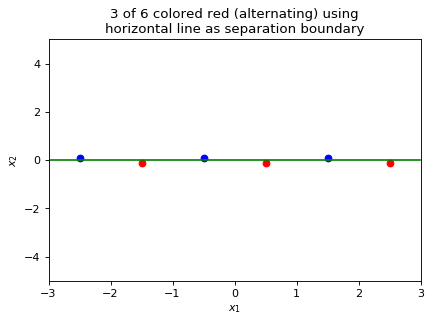

In [10]:
N = 6
x1 = np.array(xp)
x2 = np.array(yp)

Z = np.array([np.ones(N), x1, x2, x1**2, x1*x2, 
    x2**2, x1**3, x1**2 * x2, x1 * x2**2, x2**3,
    x1**4, x1**3 *x2, x1**2 * x2**2, x1* x2**3, x2**4]).T

w_tilde = -np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

y_class = np.sign(np.dot(Z, w_tilde))

#----------------------

import matplotlib.pyplot as plt
import numpy as np

# separating boundary
def f(x):
    return 0*x


xp = np.array([-2.5, -1.5, -0.5, 0.5, 1.5, 2.5])
yp = np.array([0.1, -0.1, 0.1, -0.1, 0.1, -0.1])

xf = np.arange(-3,3,0.01)
yf = f(xf)

# color points according to their classification
fig6 = plt.figure(6, dpi=80)

plt.plot(xp[y_class == +1], yp[y_class == +1], 'ro')
plt.plot(xp[y_class == -1], yp[y_class == -1], 'bo')

# plot separation boundary
plt.plot(xf,yf,'g')

plt.title('3 of 6 colored red (alternating) using\nhorizontal line as separation boundary')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim(-3,3)
plt.ylim(-5,5)
plt.show()

fig6.savefig('figures/3_of_6_colored_red_alternating.png')
fig6.savefig('figures/3_of_6_colored_red_alternating.svg')

# Conclusion

We generated all $2^6$ dichotomies and thus shattered $N = 6$ points. This means $d_{vc} \geq 6$, so we can exclude options [a] 3 and [b] 5.

The correct answer to this problem is therefore **3[c]** 15.

# Summary of the cases

![summary](figures/shatter_6_points_all_in_one.png)